In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import gc
sns.set(style="ticks", palette="Set2")
sns.despine()
from collections import defaultdict
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
mpl.rcParams['figure.figsize'] = (26, 15.6)
mpl.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import itertools
# mpl.rcParams['font.serif'] = 'Computer Modern Roman'
# mpl.rcParams.update(mpl.rcParamsDefault)

In [6]:
all_dfs = pickle.load(open('all_dfs.pickle', 'rb'))

In [2]:
total_dfs = pickle.load(open('total_dfs.pickle', 'rb'))

In [95]:
total_dfs['cigar']['maxFitness']

0     2.527493e-11
1     3.080128e-07
2     5.003195e-06
3     2.280402e-03
4     2.280402e-03
5     2.280402e-03
6     9.078283e-02
7     9.078283e-02
8     9.078283e-02
9     9.078283e-02
10    9.078283e-02
11    5.699747e-01
12    5.699747e-01
13    5.815692e-01
14    5.815692e-01
15    9.659714e-01
16    1.047138e+00
17    1.635612e+00
18    3.284197e+00
19    3.284197e+00
20    3.284197e+00
21    3.284197e+00
22    3.284197e+00
23    3.729160e+00
24    3.729160e+00
25    3.729160e+00
26    3.729160e+00
27    3.729160e+00
28    3.729160e+00
29    4.735042e+00
          ...     
14    2.556039e-01
15    2.556039e-01
16    2.556039e-01
17    2.556039e-01
18    2.932632e-01
19    2.932632e-01
20    2.932632e-01
21    2.932632e-01
0     7.925660e-03
1     7.925660e-03
2     7.925660e-03
3     7.925660e-03
4     7.925660e-03
5     7.925660e-03
6     8.779015e-03
7     8.779015e-03
8     4.314957e-02
9     4.314957e-02
10    9.348063e-02
11    9.348063e-02
12    1.225187e-01
13    2.7819

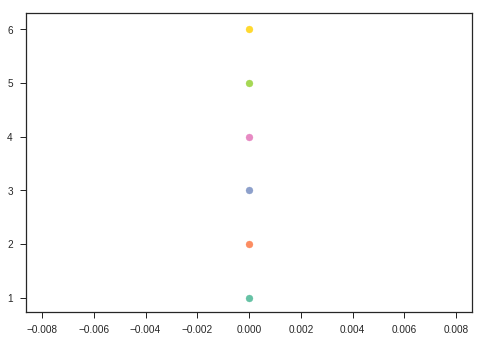

In [118]:
plt.scatter(0, 1)
plt.scatter(0, 2)
plt.scatter(0, 3)
plt.scatter(0, 4)
plt.scatter(0, 5)
plt.scatter(0, 6)
plt.show()

In [3]:
run_configs = {'cigar': {n: {} for n in range(2, 11)}, 'schaffer': {n: {} for n in range(2, 11)},
               'katsuura': {n: {} for n in range(2, 11)}}

In [4]:
run_configs_counts = {'cigar': {n: {} for n in range(2, 11)}, 'schaffer': {n: {} for n in range(2, 11)},
               'katsuura': {n: {} for n in range(2, 11)}}

In [5]:
for d_str in set(total_dfs['cigar']['run_config']):
    d = eval(d_str)
    for f in ('cigar', 'katsuura', 'schaffer'):
        if d['parentScheme'] not in run_configs[f][d['nr_of_parents']]:
            run_configs[f][d['nr_of_parents']][d['parentScheme']] = {}
        run_configs[f][d['nr_of_parents']][d['parentScheme']][d['recombinationScheme']] = 0

In [6]:
for d_str in set(total_dfs['cigar']['run_config']):
    d = eval(d_str)
    for f in ('cigar', 'katsuura', 'schaffer'):
        if d['parentScheme'] not in run_configs_counts[f][d['nr_of_parents']]:
            run_configs_counts[f][d['nr_of_parents']][d['parentScheme']] = {}
        run_configs_counts[f][d['nr_of_parents']][d['parentScheme']][d['recombinationScheme']] = 0

In [7]:
for f in ('cigar', 'katsuura', 'schaffer'):
    for i, row in total_dfs[f].iterrows():
        d = eval(row['run_config'])
        run_configs[f][d['nr_of_parents']][d['parentScheme']][d['recombinationScheme']] += \
            (row['maxFitness'] - run_configs[f][d['nr_of_parents']][d['parentScheme']][d['recombinationScheme']]) /\
            (run_configs_counts[f][d['nr_of_parents']][d['parentScheme']][d['recombinationScheme']] + 1)

In [126]:
run_configs[f][2].keys()

dict_keys(['deterministic_fitness', 'stochastic_parent', 'ranking_parent', 'tournament_parent', 'stochastic_parent_no_repitition', 'uniform'])

In [20]:
f = 'schaffer'

In [21]:
colors = {p: sns.color_palette('Set1')[i] for i, p in enumerate(run_configs['cigar'][2]['uniform'].keys())}
# shapes = {'center_of_mass': 'o', 'simple_arithmetic': '^', 'uniform': 'X', 'whole_arithmetic': 'D'}
shapes = {'deterministic_fitness': 'o', 'stochastic_parent': '^', 'ranking_parent': 'X', 'tournament_parent': '*',
         'uniform': 'P'}

In [22]:
selections = {'deterministic_fitness': 'Deterministic',
              'stochastic_parent': 'Stochastic',
              'ranking_parent': 'Ranking', 'tournament_parent': 'Tournament', 'uniform': 'Uniform'}
recombinations = {'center_of_mass': 'Center of Mass', 'simple_arithmetic': 'Simple Arithmetic',
                  'uniform': 'Uniform', 'whole_arithmetic': 'Random Arithmetic'}

In [23]:
config_index = {config: i for i, config in enumerate(itertools.product(selections.keys(), recombinations.keys()))}

In [24]:
time_series = np.zeros((20, 9))

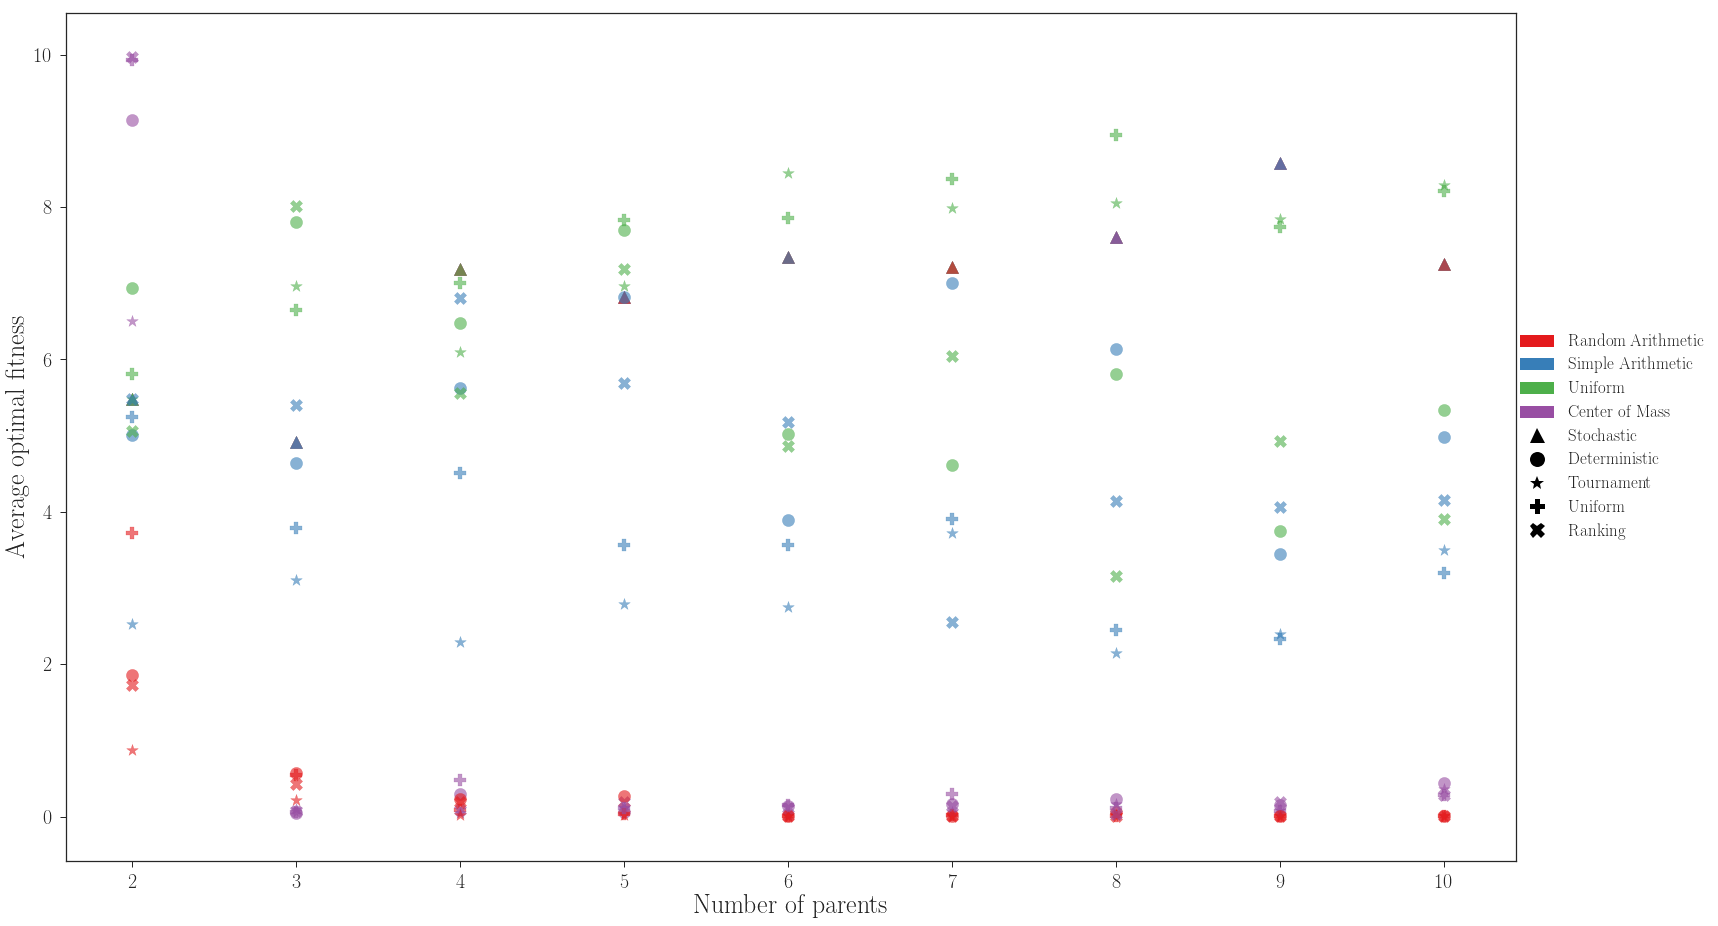

In [25]:
for n in run_configs[f].keys():
    n_d = run_configs[f][n]
    
    for p in n_d.keys():
        p_d = n_d[p]
        
        if p not in shapes:
            continue

        s = shapes[p]

        for r in p_d.keys():
            c = colors[r]
            time_series[config_index[(p, r)], n - 2] = p_d[r]
            plt.scatter(n, p_d[r], c=c, marker=s, alpha=0.6, s=150)
            
legend_elements = [Patch(facecolor=sns.color_palette('Set1')[i], label=recombinations[r])
                   for i, r in enumerate(run_configs[f][2]['uniform'].keys())]
legend_elements += [Line2D([0], [0], marker=shapes[p], color='black', label=selections[p], lw=0,
                    markersize=15) for i, p in enumerate(run_configs[f][2].keys()) if p in selections]
            
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(handles=legend_elements, loc='right', prop={'size': 17}, bbox_to_anchor=(1.14, 0.5))
plt.xlabel('Number of parents', fontsize=26)
plt.ylabel('Average optimal fitness', fontsize=26)
plt.savefig('schaffer.pdf', dpi=400)    
plt.show()

In [498]:
slopes = np.array([np.polyfit(range(2, 11), time_series[i], 1)[0] for i in range(20)])

In [499]:
mod_slopes = slopes - slopes.mean()

In [500]:
slopes.mean()

-0.00085258176574914035

In [501]:
-abs(slopes.mean()), abs(slopes.mean())

(-0.00085258176574914035, 0.00085258176574914035)

In [502]:
N = int(1.5E6)

In [503]:
vals = np.fromiter((mod_slopes[np.random.randint(0, 20, 20)].mean() for __ in range(N)), float)
print((1/N) * sum((-abs(slopes.mean()) >= vals) | (vals >= abs(slopes.mean()))))
del vals
print(np.percentile(np.fromiter((mod_slopes[np.random.randint(0, 20, 20)].mean() for __ in range(N)), float), q=(2.5, 97.5)))
gc.collect()

0.724350666667
[-0.00448386  0.0049114 ]


31407

In [456]:
gc.collect()

0

In [392]:
slopes.mean()

-0.32582378466254297

In [412]:
f = 'katsuura'

In [413]:
colors = {p: sns.color_palette('Set1')[i] for i, p in enumerate(run_configs['cigar'][2]['uniform'].keys())}
# shapes = {'center_of_mass': 'o', 'simple_arithmetic': '^', 'uniform': 'X', 'whole_arithmetic': 'D'}
shapes = {'deterministic_fitness': 'o', 'stochastic_parent': '^', 'ranking_parent': 'X', 'tournament_parent': '*',
         'uniform': 'P'}

In [414]:
selections = {'deterministic_fitness': 'Deterministic',
              'stochastic_parent': 'Stochastic',
              'ranking_parent': 'Ranking', 'tournament_parent': 'Tournament', 'uniform': 'Uniform'}
recombinations = {'center_of_mass': 'Center of Mass', 'simple_arithmetic': 'Simple Arithmetic',
                  'uniform': 'Uniform', 'whole_arithmetic': 'Whole Arithmetic'}

In [415]:
config_index = {config: i for i, config in enumerate(itertools.product(selections.keys(), recombinations.keys()))}

In [416]:
time_series = np.zeros((20, 9))

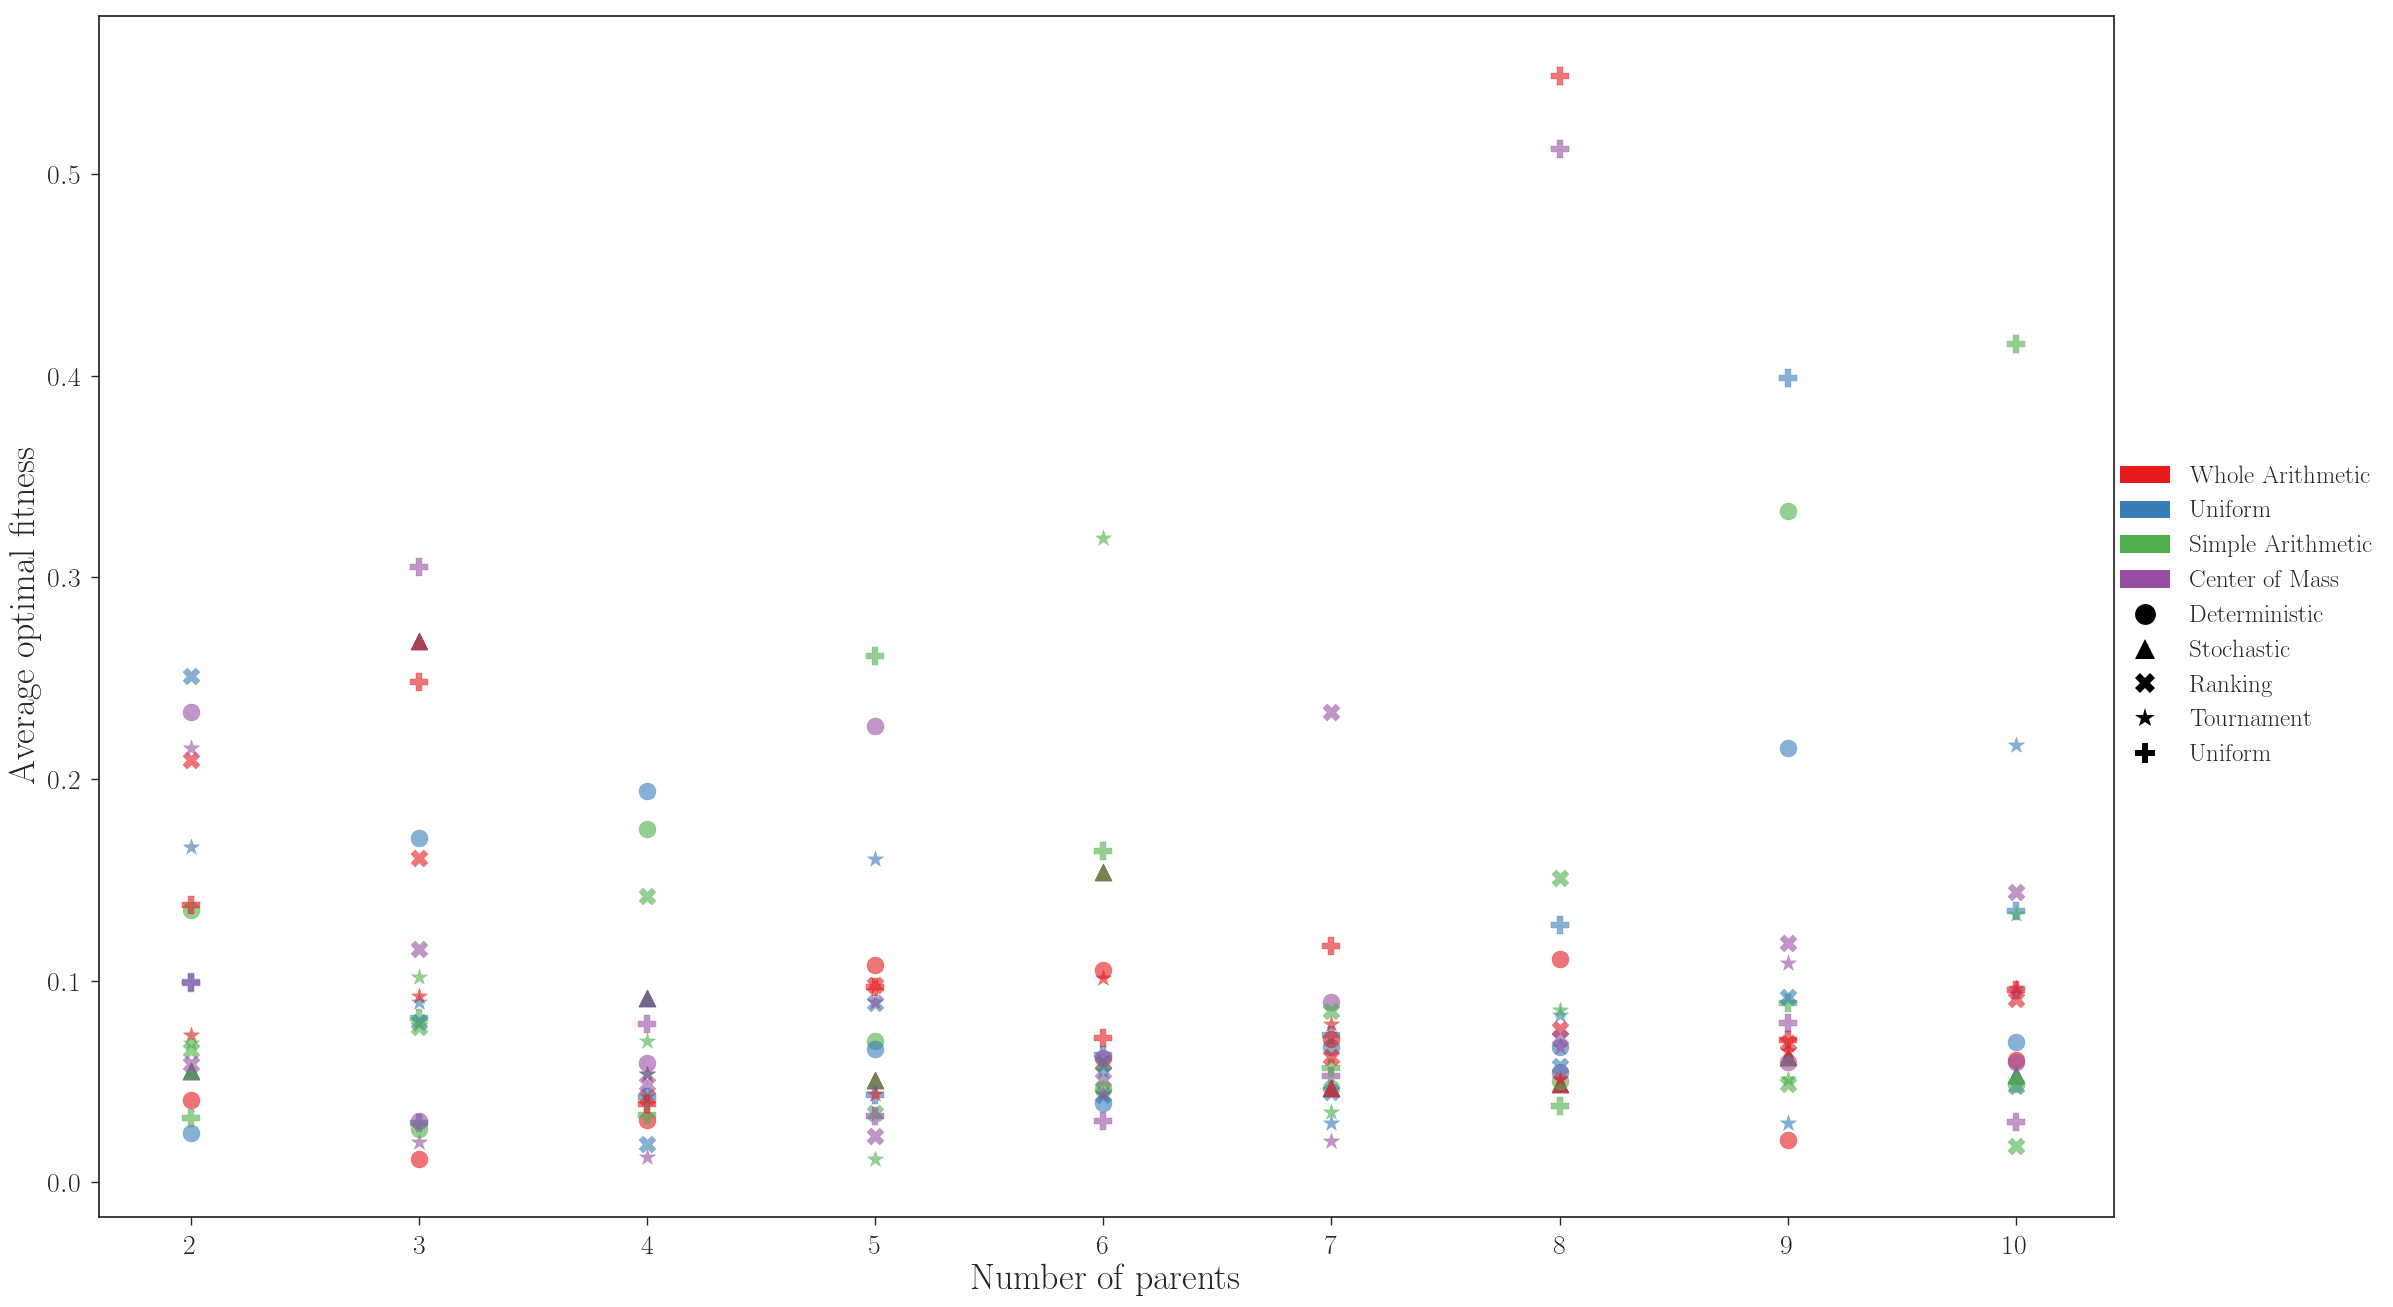

In [417]:
for n in run_configs[f].keys():
    n_d = run_configs[f][n]
    
    for p in n_d.keys():
        p_d = n_d[p]
        
        if p not in shapes:
            continue

        s = shapes[p]

        for r in p_d.keys():
            c = colors[r]
            time_series[config_index[(p, r)], n - 2] = p_d[r]
            plt.scatter(n, p_d[r], c=c, marker=s, alpha=0.6, s=150)
            
legend_elements = [Patch(facecolor=sns.color_palette('Set1')[i], label=recombinations[r])
                   for i, r in enumerate(run_configs[f][2]['uniform'].keys())]
legend_elements += [Line2D([0], [0], marker=shapes[p], color='black', label=selections[p], lw=0,
                    markersize=15) for i, p in enumerate(run_configs[f][2].keys()) if p in selections]
            
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(handles=legend_elements, loc='right', prop={'size': 18}, bbox_to_anchor=(1.14, 0.5))
plt.xlabel('Number of parents', fontsize=26)
plt.ylabel('Average optimal fitness', fontsize=26)
plt.savefig('katsuura.pdf', dpi=400)    
plt.show()

In [316]:
slopes = np.array([np.polyfit(range(2, 11), time_series[i], 1)[0] for i in range(20)])

In [321]:
slopes

array([-0.01251605,  0.00502498,  0.00104775,  0.00386563, -0.01194132,
       -0.01194132, -0.01194132, -0.01194132,  0.01009317, -0.00341277,
       -0.0123737 , -0.01194894, -0.00299848,  0.0026277 , -0.00081462,
        0.0006649 , -0.00110279,  0.02270921,  0.02416669,  0.00568097])

In [317]:
mod_slopes = slopes - slopes.mean()

In [318]:
N = 750000

In [319]:
print(np.percentile(np.fromiter((mod_slopes[np.random.randint(0, 20, 20)].mean() for __ in range(N)), float), q=(2.5, 97.5)))
gc.collect()

[-0.00448028  0.00492104]


30768

In [320]:
slopes.mean()

-0.00085258176574914035